<a href="https://colab.research.google.com/github/deblinablog/ML_project/blob/master/ML_Project_Deblina_Chakraborty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT TITLE :**

**Marketing Campaign For Banking Products**

**PROBLEM STATEMENT**:  The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.



**Objective:** 
The classification goal is to predict the likelihood of a liability customer buying personal loans.

**1.Importing libraries and dataset**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets_Bank_Personal_Loan_Modelling.csv to datasets_Bank_Personal_Loan_Modelling.csv


In [ ]:
dataset = pd.read_csv("/content/datasets_Bank_Personal_Loan_Modelling.csv")

In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['datasets_Bank_Personal_Loan_Modelling.csv']))

**CHECKING TYPE OF DATA AND BASIC SUMMARY -> statistical summary, shape, null values etc**

In [ ]:
#to display the top 10 rows
dataset.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
#to display the last 10 rows
dataset.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
dataset.shape

(5000, 14)

In [ ]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#Dropping the values which is null
dataset.dropna()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


**2. Dropping the irrelevant columns: To check if we need to clean the data for any of the variables**

In [ ]:
# first determine correlation between age and experience
experience=dataset["Experience"]
age=dataset["Age"]
correlation=age.corr(experience)
correlation                   
#(it says that both age and experience are correlated )

0.9942148569683321

In [ ]:
# Id is the variable which has no signal because it does not have to do anything with the personal loan variable. so we will drop it.
dataset=dataset.drop(["ID"],axis=1)
dataset.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataset=dataset.drop(["Experience"],axis=1)
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataset.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**3. (EDA) EXPLORATORY DATA ANALYSIS : Study the data distribution in each attribute and target variable, share your findings. 
● Number of unique in each column? 
● Number of people with zero mortgage?
● Number of people with zero credit card spending per month?
● Value counts of all categorical columns.
 ● Univariate and Bivariate analysis**

Now looking into the nature of Variables:

1) ID: We have already set this as our Index column and it is already omitted as it has no relation with the personal loan variable.

2) Age: The age of customer is a numerical data.

3) Income: Annual Income of customers is a numerical type of data. It is the variable which is important to predict the value of target variable that whether the person will get loan or not.

4) ZIP Code: address of the Customers.It is not an important variable while determining the target variable.

5) Family: size of family of the customer.

6) CC Avg: Credit cards spending per month ($000). This is a Numerical data type.

7) Education: This is a Nominal categorical data type.

8) Mortgage: It is Numerical data type which gives the value of House mortgage. 9) Personal Load: This is our feature to be predicted. The data in the column is categorical and nominal.

10) Securities Account: This Nominal Categorical data type indicates if the Customer has an account in the bank.

11) CD Account: This is one of our Categorical data columns.

12) Online: This Nominal Categorical data type tells if the Customer has an Online Account.

13) Credit Card: This Nominal Categotical data value tells about possession of Credit card by the Customer.

so, we can broadly divide our Dataset into variables:

A) Numerical: ['age', 'experience', 'income', 'zip code', 'family', 'ccavg', education', 'mortgage']

B) Categorical: ['personal loan', 'securities account', 'cd account', 'online', 'creditcard']

In [ ]:
#number of unique in each column
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
dataset.drop('ZIP Code', axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
# Number of people with zero mortage
(dataset.Mortgage==0).sum()

3462

In [ ]:
# Number of people with 0 credit card spending  per month
(dataset.CCAvg==0).sum()

106

In [ ]:
dataset["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
dataset["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
dataset["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
dataset.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

**UNIVARIATE ANALYSIS**

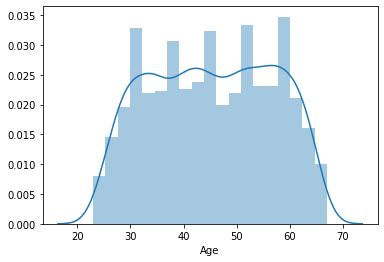

In [ ]:
sns.distplot(dataset["Age"])      
#It is also normally distributed

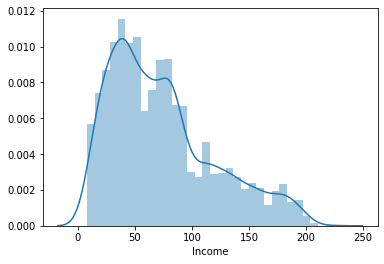

In [ ]:
# Income is right skewed Distribution
sns.distplot(dataset.Income);

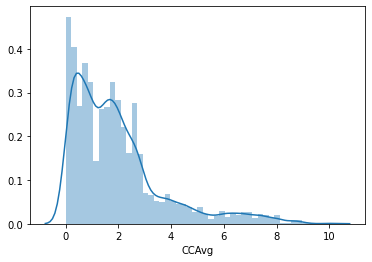

In [ ]:
# Credit Card Average is right skewed Distribution
sns.distplot(dataset.CCAvg);

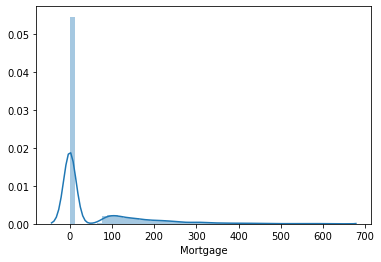

In [ ]:
# Mortgage seems to be highly skewed
sns.distplot(dataset.Mortgage);

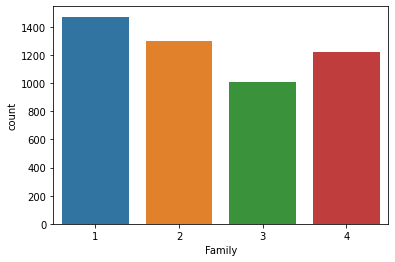

In [ ]:
sns.countplot(dataset.Family);

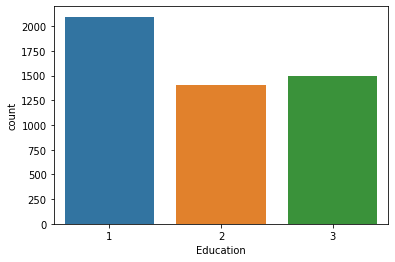

In [ ]:
sns.countplot(dataset.Education);

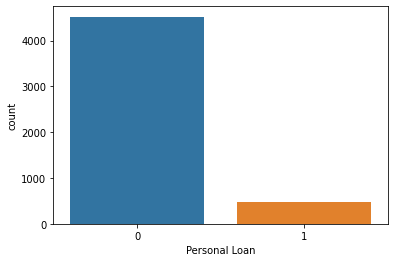

In [ ]:
sns.countplot(dataset["Personal Loan"])      
#It shows that there are 4520 people who will not get loan while there are only 480 people who will get loan

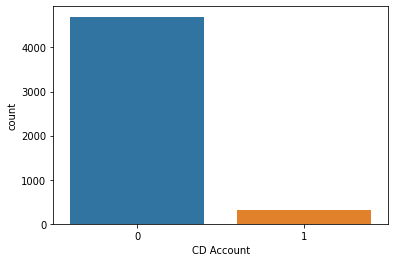

In [ ]:
sns.countplot(dataset["CD Account"])

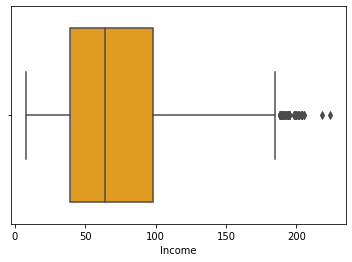

In [ ]:
sns.boxplot(dataset["Income"],color="orange")

**BIVARIATE OR MULTIVARIATE ANALYSIS :**

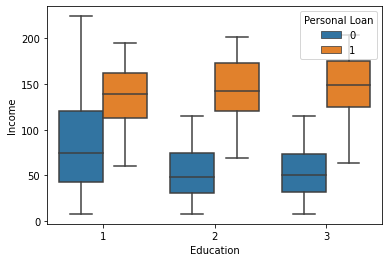

In [ ]:
# It seems that the customers who has more Income is granted loan across each Education level
sns.boxplot(x='Education', y='Income',hue='Personal Loan', data=dataset);

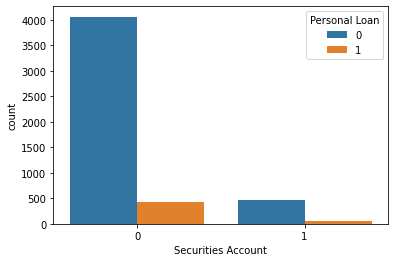

In [ ]:
# Majority of people having Security Account don't have Personal loan
sns.countplot(x='Securities Account', hue='Personal Loan',data=dataset);

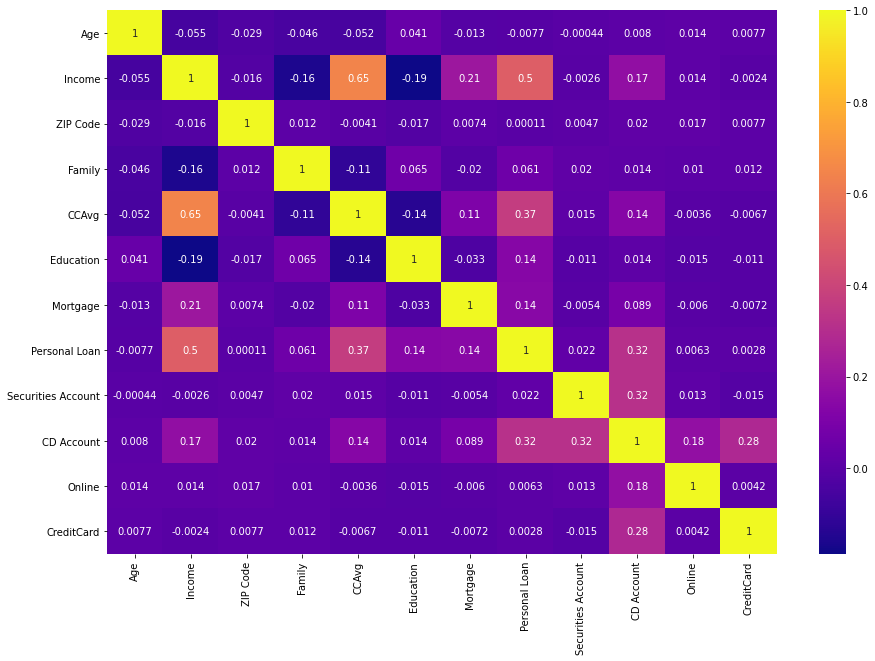

In [ ]:
# After dropping experience column earlier doesn't seem to be significant correlation between other object variable
# Credit Card Average and Income
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='plasma',annot=True);

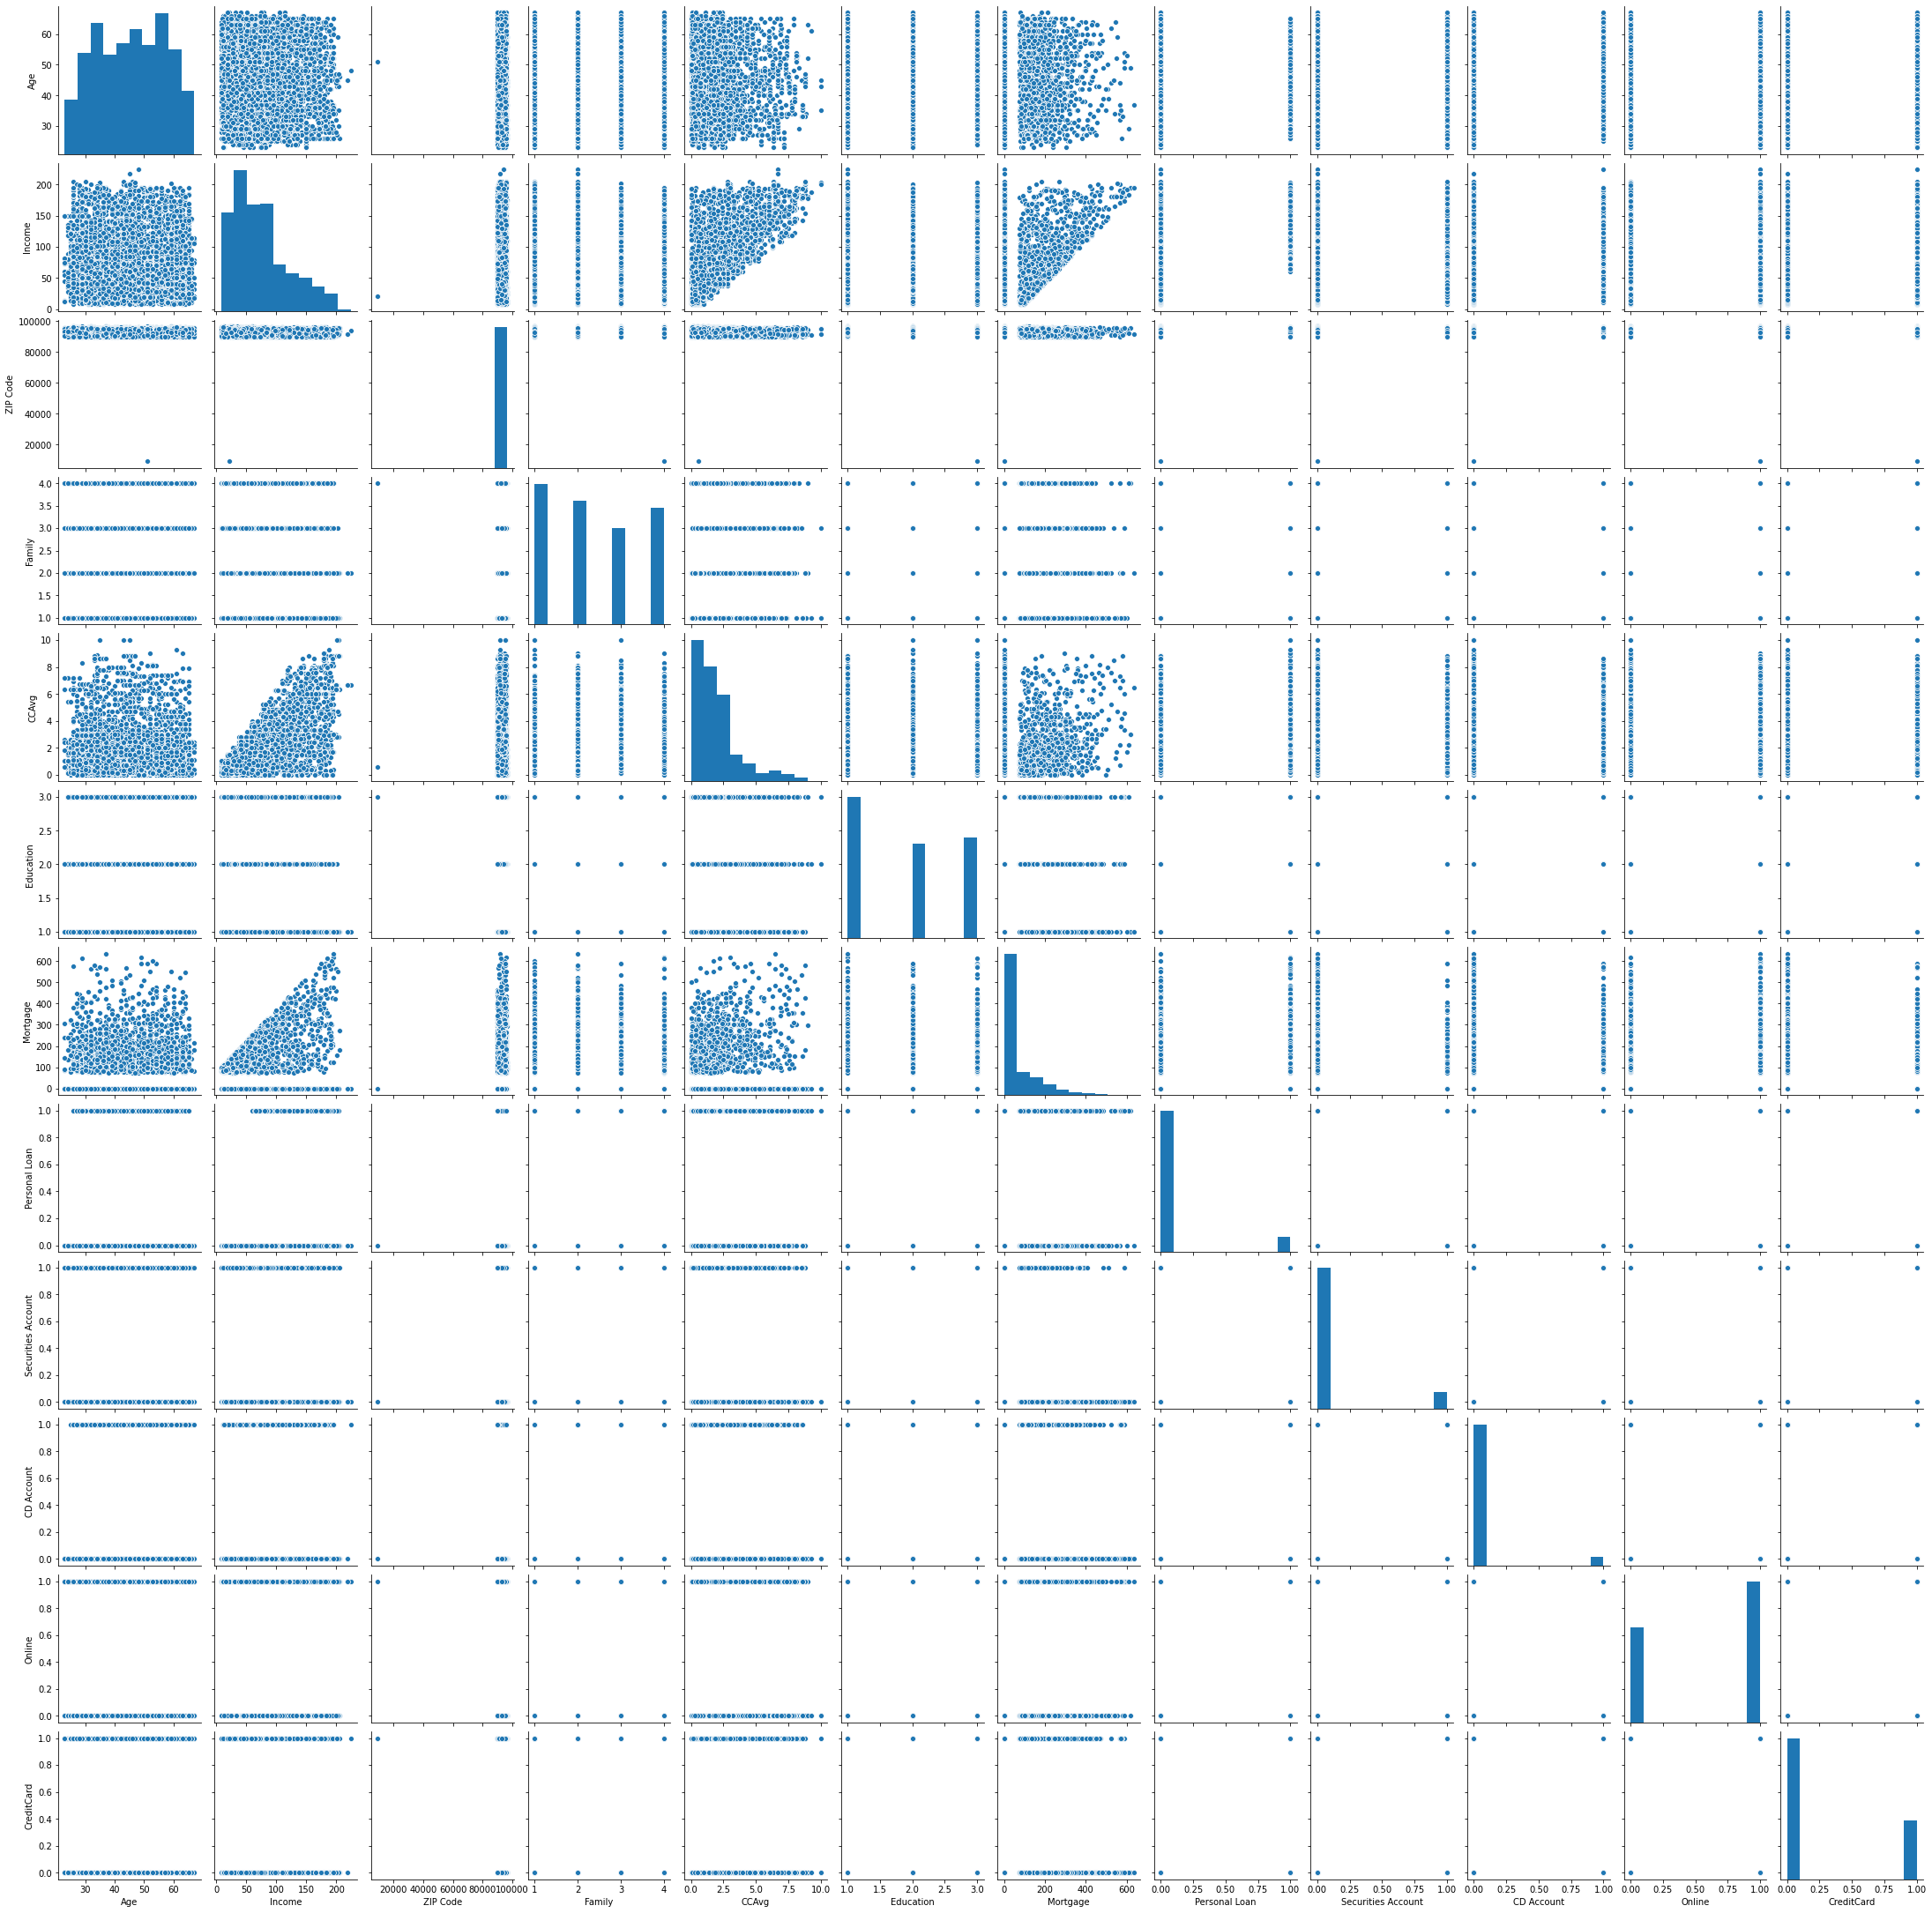

In [ ]:
sns.pairplot(dataset)

In [ ]:
data_X=dataset.loc[:,dataset.columns != "Personal Loan"]
data_Y=dataset[["Personal Loan"]]

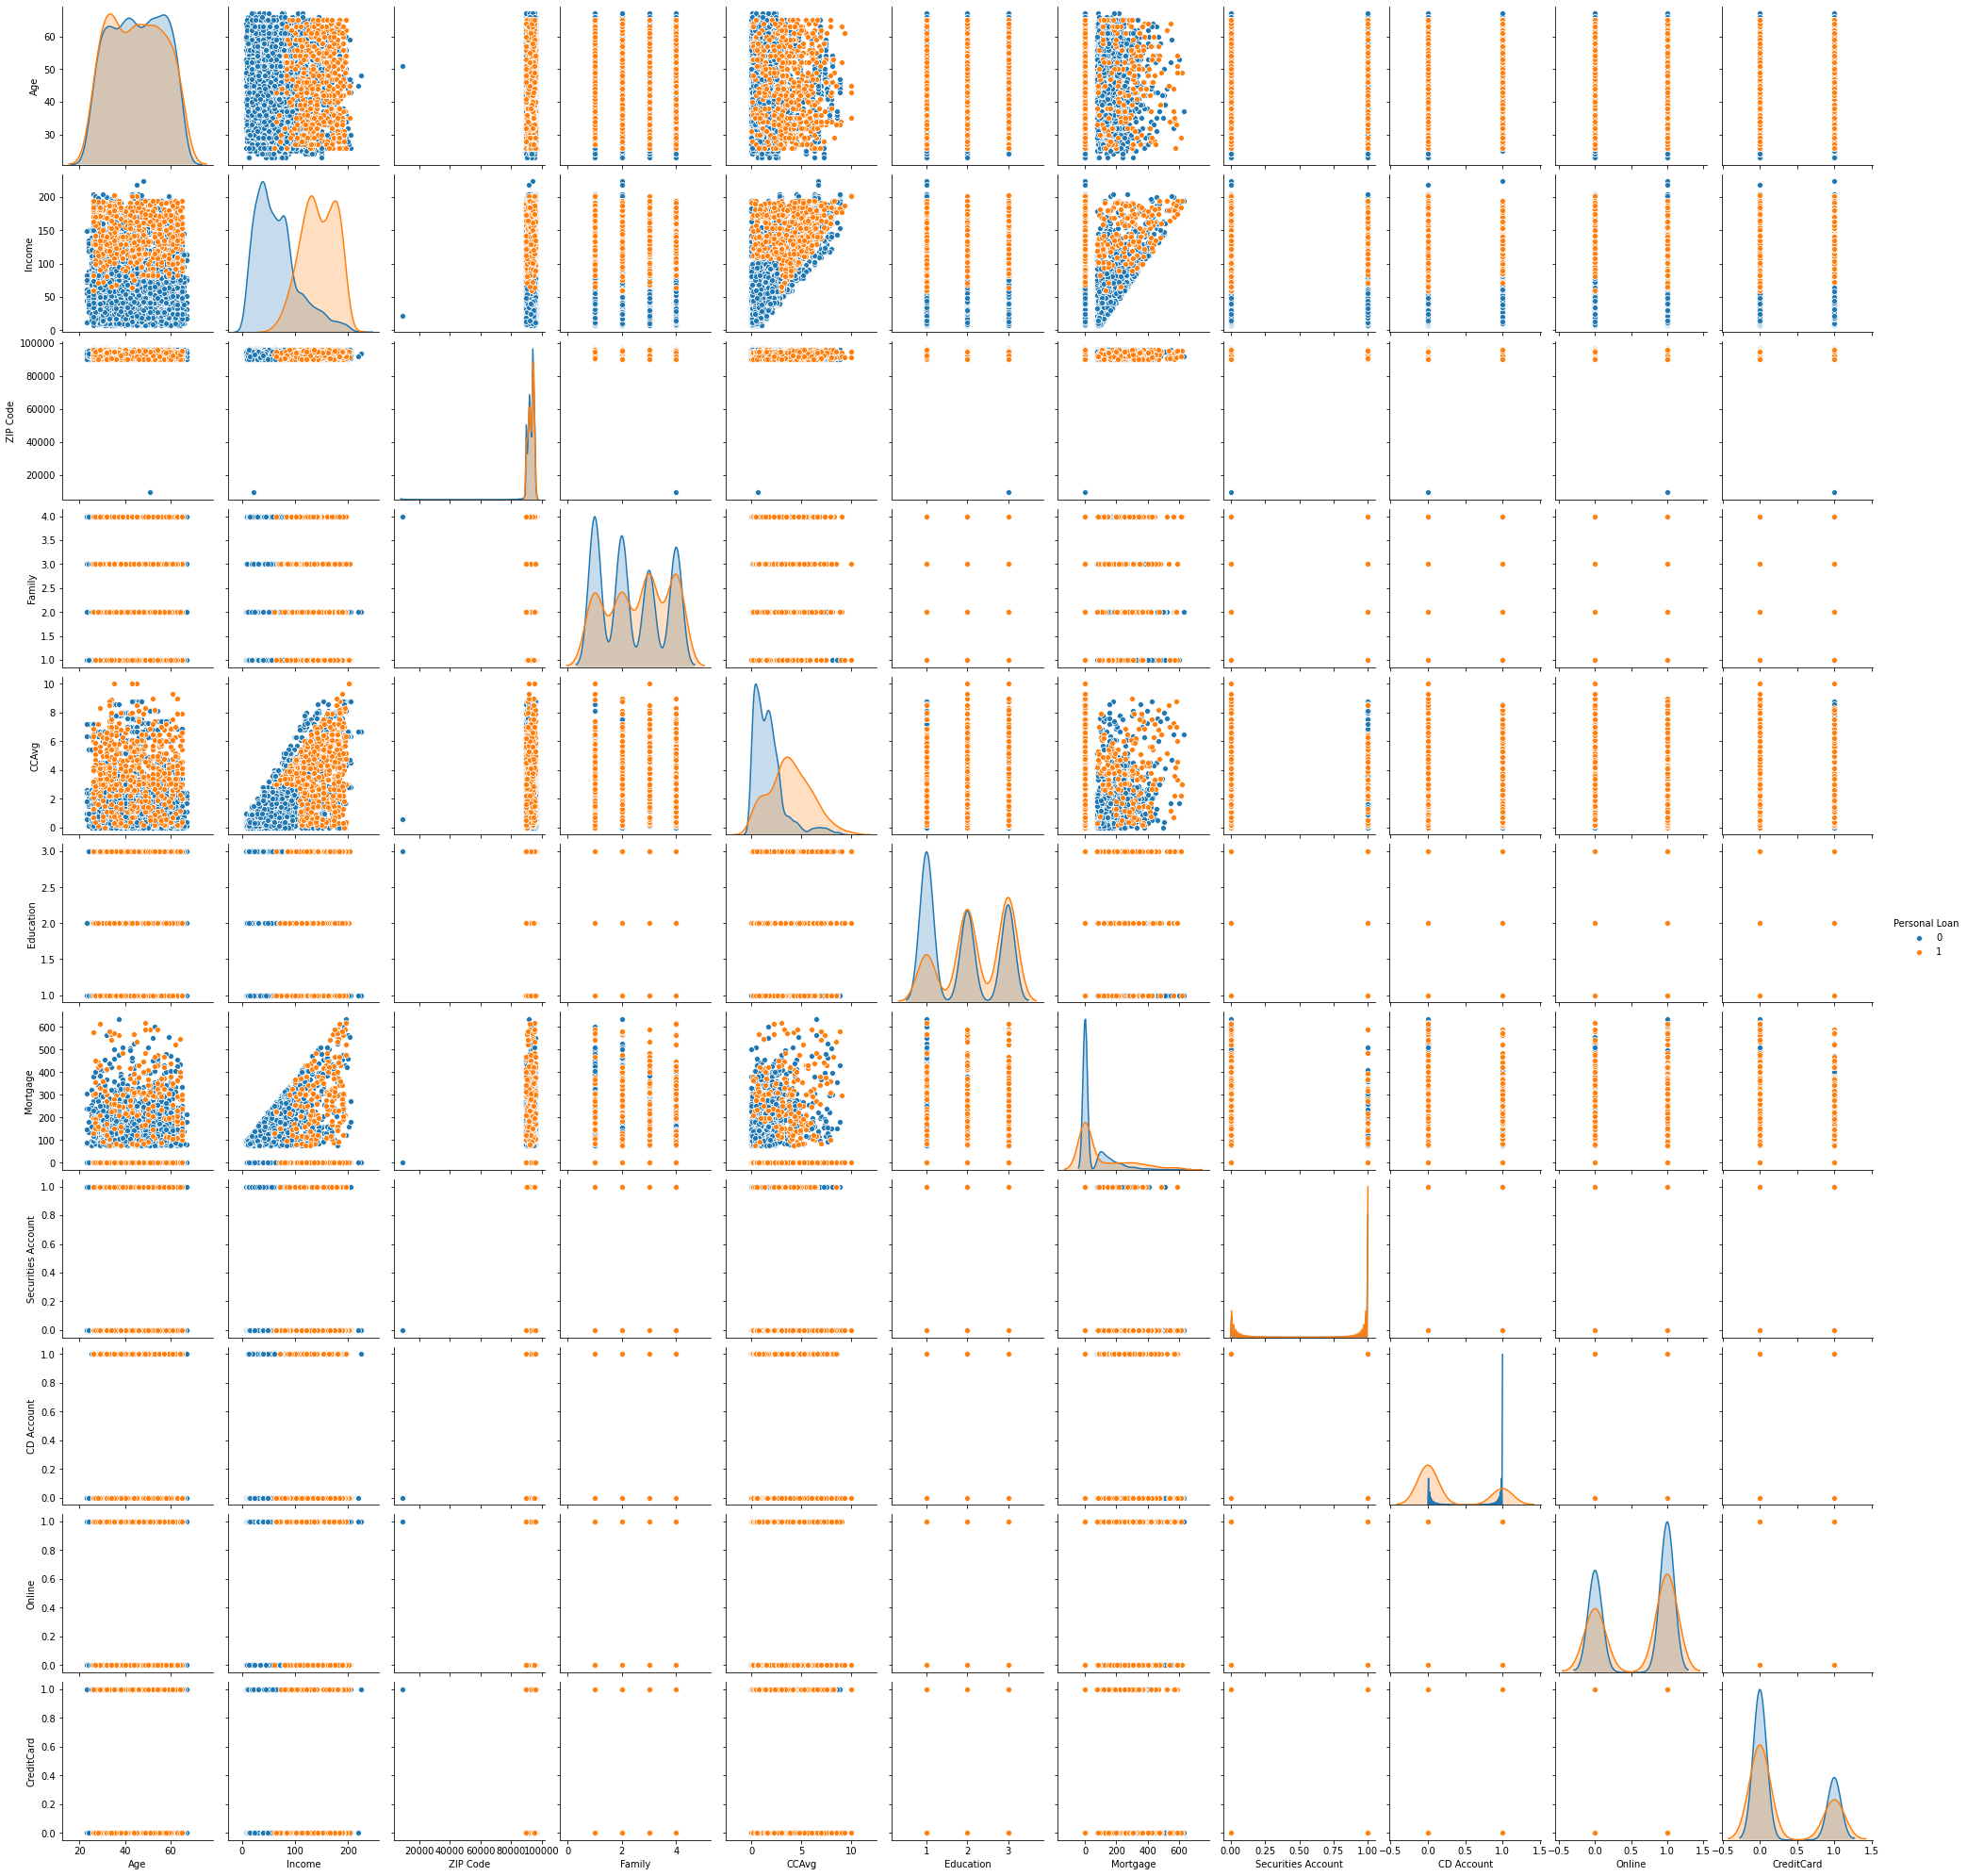

In [ ]:
sns.pairplot(dataset,diag_kind='kde',hue='Personal Loan')

**4. TRANSFORMATION OF FEATURE VARIABLE : Apply necessary transformations for the feature variables**

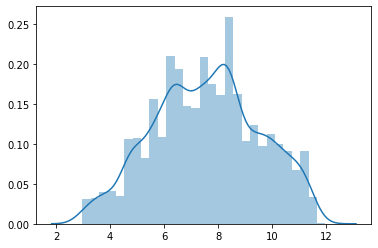

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
sns.distplot(pt.transform(data_X["Income"].values.reshape(-1,1)))


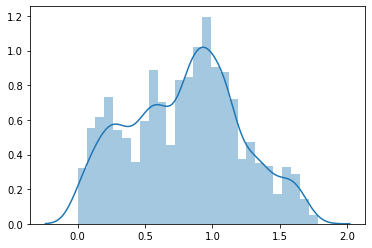

In [ ]:
pt=PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(pt.transform(data_X["CCAvg"].values.reshape(-1,1)))


In [ ]:
data_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,91107,4,1.6,1,1,0,0,0,0
1,45,34,90089,3,1.5,1,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,1,0


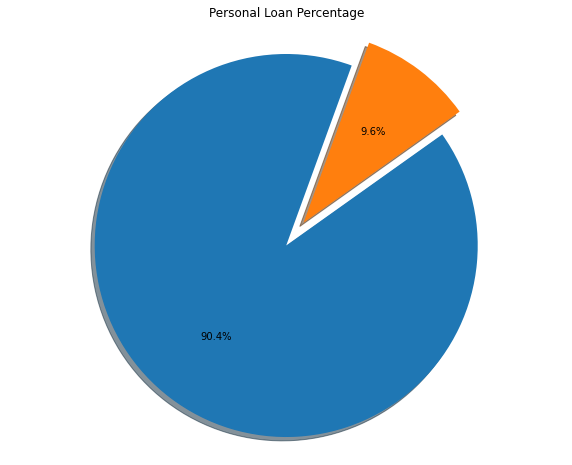

In [ ]:
## Univariate analysis
# 9.6% of all the applicants get approved for Personal Loan
tempDF=pd.DataFrame(dataset["Personal Loan"].value_counts()).reset_index()
tempDF.columns=["Labels","Personal Loan"]
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tempDF["Personal Loan"],explode=explode,autopct='%1.1f%%',
        shadow=True,startangle=70)
ax1.axis('equal')   #Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Personal Loan Percentage")
plt.show()


**5. Splitting the data using stratified sampling : Normalise your data and split the data into training and test set in the ratio of 70:30 respectively**

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y,test_Y =train_test_split(data_X,data_Y,test_size=0.3,stratify=data_Y,random_state=0)

In [ ]:
train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

In [ ]:
train_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,51,24,94301,3,0.4,1,0,0,1,1,0
1,64,35,90266,1,1.5,2,1,0,0,0,0
2,52,31,94923,4,1.8,1,0,0,1,1,0
3,32,20,93106,1,0.5,3,0,0,1,0,1
4,62,54,91320,1,0.8,1,1,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
train_X,test_X,train_Y,test_Y = train_test_split(data_X,data_Y,test_size = 0.3, random_state = 0,stratify = data_Y)
scx.fit_transform(train_X)
scx.transform(test_X)


array([[-0.97265109,  2.31851937, -0.06183544, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.85873161,  0.16296952, -0.45946585, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.24827071,  1.18631137,  0.6384359 , ..., -1.19253735,
        -0.65376311, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.68832425, ..., -1.19253735,
         1.52960605,  0.68340496],
       [-0.97265109, -0.53377386,  0.38085975, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [-0.01335539, -0.33781479,  0.38085975, ...,  0.83854816,
        -0.65376311, -0.47490853]])

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score, roc_auc_score,accuracy_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
np_train_X=train_X.values
np_train_Y=train_Y.values
np_test_X=test_X.values
np_test_Y=test_Y.values

**Logistic Regression** 

In [ ]:
cls_1= LogisticRegression(random_state=0)
cls_2= DecisionTreeClassifier(random_state=0,max_depth=8)
cls_3= RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)

cls_1.fit(np_train_X,np_train_Y.ravel())
pred_1_test_X=cls_1.predict(np_test_X)
pred_1_train_X=cls_1.predict(np_train_X)
acc_1_train_X= accuracy_score(np_train_Y, pred_1_train_X)
acc_1_test_X= accuracy_score(np_test_Y, pred_1_test_X)
print("Base learner 1 accuracy on np_train_x: {:.4f}".format(acc_1_train_X))
print("Base learner 1 accuracy on np_test_x: {:.4f}".format(acc_1_test_X))

cls_2.fit(np_train_X,np_train_Y.ravel())
pred_2_test_X=cls_2.predict(np_test_X)
pred_2_train_X=cls_2.predict(np_train_X)
acc_2_train_X= accuracy_score(np_train_Y, pred_2_train_X)
acc_2_test_X= accuracy_score(np_test_Y, pred_2_test_X)
print("Base learner 2 accuracy on np_train_x: {:.4f}".format(acc_2_train_X))
print("Base learner 2 accuracy on np_test_x: {:.4f}".format(acc_2_test_X))


cls_3.fit(np_train_X,np_train_Y.ravel())
pred_3_test_X=cls_3.predict(np_test_X)
pred_3_train_X=cls_3.predict(np_train_X)
acc_3_train_X= accuracy_score(np_train_Y, pred_3_train_X)
acc_3_test_X= accuracy_score(np_test_Y, pred_3_test_X)
print("Base learner 3 accuracy on np_train_x: {:.4f}".format(acc_3_train_X))
print("Base learner 3 accuracy on np_test_x: {:.4f}".format(acc_3_test_X))


Base learner 1 accuracy on np_train_x: 0.9071
Base learner 1 accuracy on np_test_x: 0.9107
Base learner 2 accuracy on np_train_x: 0.9960
Base learner 2 accuracy on np_test_x: 0.9787
Base learner 3 accuracy on np_train_x: 0.9949
Base learner 3 accuracy on np_test_x: 0.9867


In [ ]:
def draw_cm(actual, predicted):
  cm=confusion_matrix(actual,predicted)
  sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
  plt.ylabel('Obeserved')
  plt.xlabel('Predicted')
  plt.show()

In [ ]:
np_test_Y.shape

(1500, 1)

Confusion Matrix


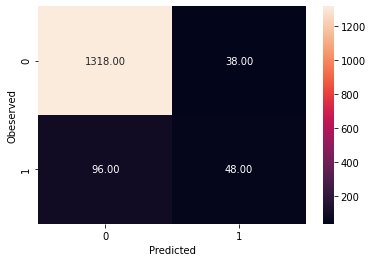

None


In [ ]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_1_test_X.reshape(-1,1)))

In [ ]:
print("Recall: ", recall_score(np_test_Y,pred_1_test_X))
print()
print("Precision: ",precision_score(np_test_Y,pred_1_test_X))
print()
print("F1 score: ",f1_score(np_test_Y,pred_1_test_X))
print()
print("ROC Auc Score: ",roc_auc_score(np_test_Y,pred_1_test_X))

Recall:  0.3333333333333333

Precision:  0.5581395348837209

F1 score:  0.41739130434782606

ROC Auc Score:  0.6526548672566371


Confusion Matrix


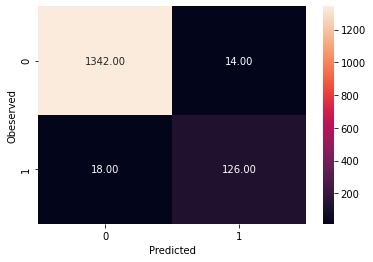

None


In [ ]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_2_test_X))

In [ ]:
print("Recall: ", recall_score(np_test_Y,pred_2_test_X))
print()
print("Precision: ",precision_score(np_test_Y,pred_2_test_X))
print()
print("F1 score: ",f1_score(np_test_Y,pred_2_test_X))
print()
print("ROC Auc Score: ",roc_auc_score(np_test_Y,pred_2_test_X))

Recall:  0.875

Precision:  0.9

F1 score:  0.8873239436619719

ROC Auc Score:  0.9323377581120944


Confusion Matrix


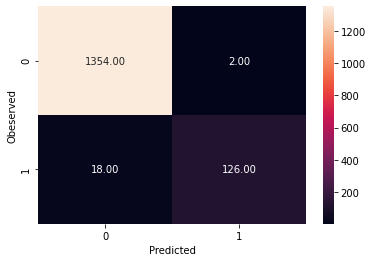

None


In [ ]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_3_test_X))

In [ ]:
print("Recall: ", recall_score(np_test_Y,pred_3_test_X))
print()
print("Precision: ",precision_score(np_test_Y,pred_3_test_X))
print()
print("F1 score: ",f1_score(np_test_Y,pred_3_test_X))
print()
print("ROC Auc Score: ",roc_auc_score(np_test_Y,pred_3_test_X))

Recall:  0.875

Precision:  0.984375

F1 score:  0.9264705882352942

ROC Auc Score:  0.9367625368731564


**Various other classification algorithms**

**DECISION TREE MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(train_X,train_Y)

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online','CreditCard','Education', 
                                                                  'Mortgage', 'Securities Account', 'CD Account','Personal Loan'],filled=True, rounded=True) 
graph = graphviz.Source(dot_data)

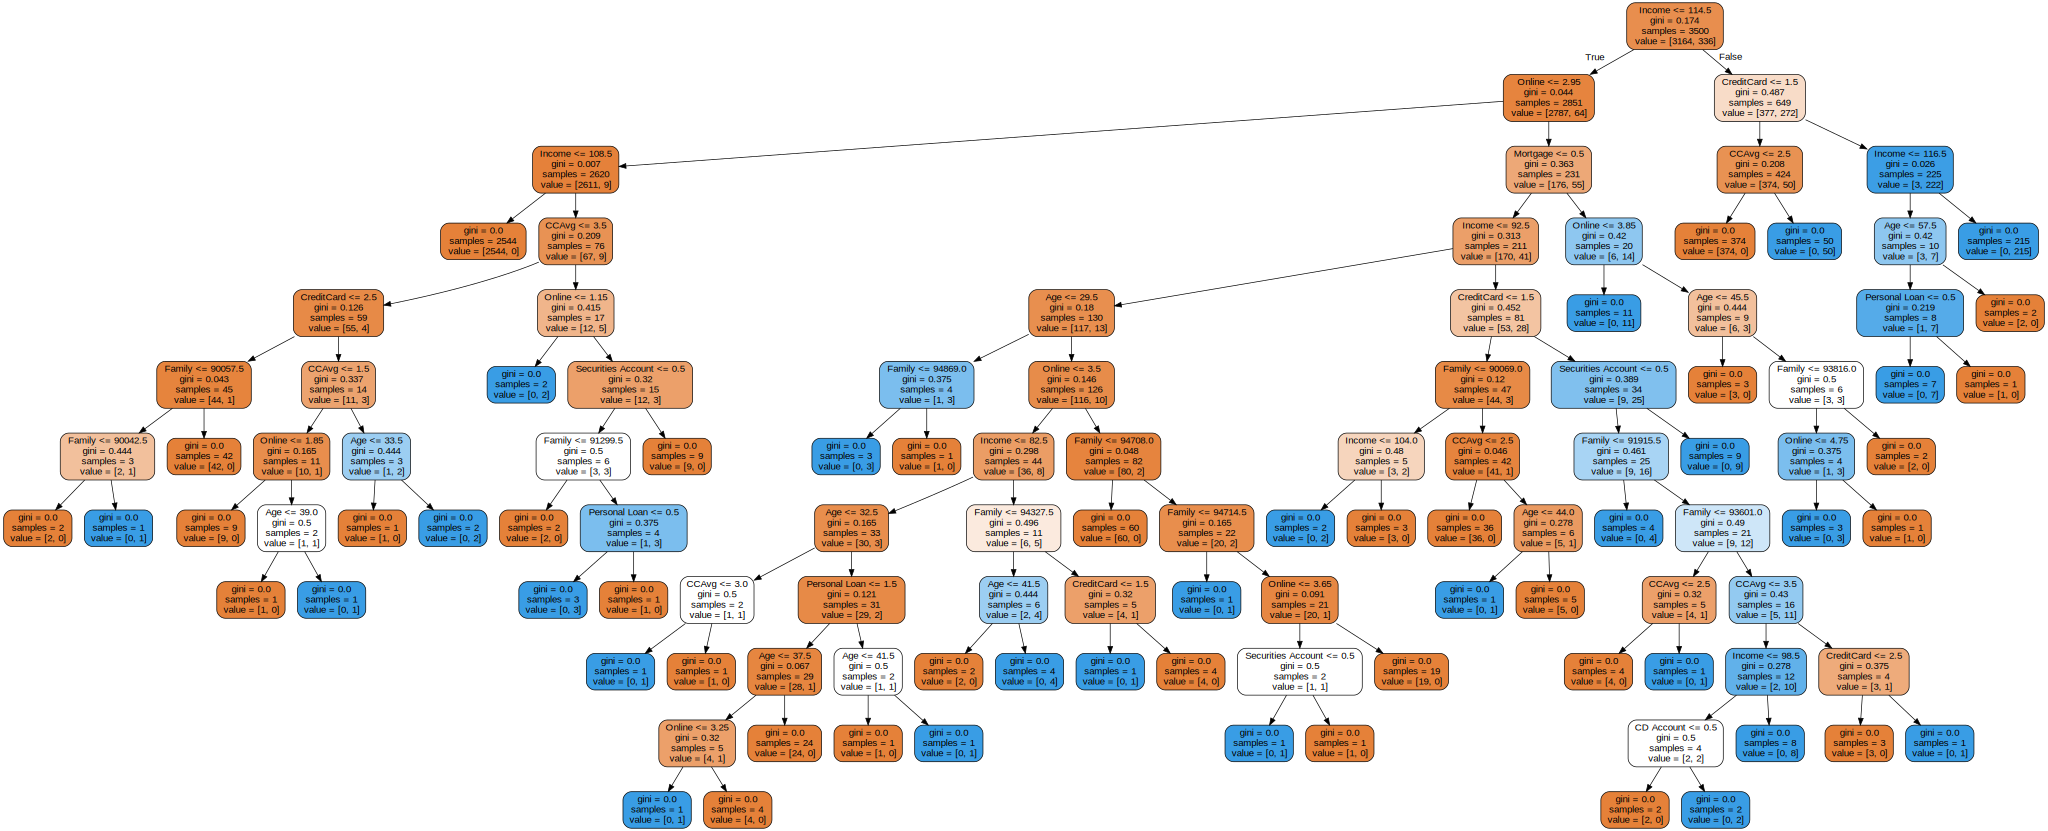

In [ ]:
graph

In [ ]:
y_pred = clf.predict(test_X)

In [ ]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(test_Y,y_pred))
print("R2 score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE: 0.020666666666666667
R2 score: 0.7618608652900688
Accuracy score for test data 0.9793333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y1_pred = model.predict(test_X)

In [ ]:

print("Accuracy score for train data",metrics.accuracy_score(train_Y, model.predict(train_X)))

Accuracy score for train data 0.9071428571428571


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,y_pred))

[[1340   16]
 [  15  129]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.89      0.90      0.89       144

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



**RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(test_X)

In [ ]:
print("MAE:",metrics.mean_absolute_error(test_Y,y_pred))
print("R2 score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE: 0.012666666666666666
R2 score: 0.8540437561455261
Accuracy score for test data 0.9873333333333333


In [ ]:
print("Accuracy score for train data",metrics.accuracy_score(train_Y,model.predict(train_X)))

Accuracy score for train data 0.9071428571428571


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,y_pred))

[[1353    3]
 [  16  128]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.89      0.93       144

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = model.predict(test_X)

In [ ]:
print("MAE:",metrics.mean_absolute_error(test_Y,y_pred))
print("R2 score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE: 0.10666666666666667
R2 score: -0.22910521140609652
Accuracy score for test data 0.8933333333333333


In [ ]:
print("Accuracy score for train data",metrics.accuracy_score(train_Y,model.predict(train_X)))

Accuracy score for train data 0.8837142857142857


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,y_pred))

[[1253  103]
 [  57   87]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.46      0.60      0.52       144

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.91      0.89      0.90      1500



**K nearest neighbors algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = neigh.predict(test_X)

In [ ]:
print("MAE:",metrics.mean_absolute_error(test_Y,y_pred))
print("R2 score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE: 0.10266666666666667
R2 score: -0.18301376597836794
Accuracy score for test data 0.8973333333333333


In [ ]:
print("Accuracy score for train data",metrics.accuracy_score(train_Y,model.predict(train_X)))

Accuracy score for train data 0.8837142857142857


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,y_pred))

[[1292   64]
 [  90   54]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1356
           1       0.46      0.38      0.41       144

    accuracy                           0.90      1500
   macro avg       0.70      0.66      0.68      1500
weighted avg       0.89      0.90      0.89      1500

